In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('../fifa_dataset2.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [5]:
columns_feature_selection = ['Age','Nationality','Overall','Value','Wage','Preferred Foot','Body Type','Jersey Number',
'Joined','Contract Valid Until','Height','Finishing','ShortPassing','Volleys','Curve','LongPassing','Acceleration',
'Reactions','Balance','Strength','LongShots','Interceptions','Positioning','Vision','Composure','StandingTackle',
'GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

In [6]:
df1 = df[columns_feature_selection]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

## Standard Scaling

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

## Kmeans

In [10]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)

## Evaluation metrics

In [12]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(df1['Release Clause'].values, labels)
adjusted_rand = adjusted_rand_score(df1['Release Clause'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(df1['Release Clause'].values, labels)
v_measure = v_measure_score(df1['Release Clause'].values, labels)
completeness = completeness_score(df1['Release Clause'].values, labels)
homogeneity = homogeneity_score(df1['Release Clause'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")

Silhouette Score: 0.4103
Calinski-Harabasz Score: 6223.1544
Davies-Bouldin Score: 0.9746
Normalized Mutual Info: 0.0193
Adjusted Rand Index: 0.0008
Adjusted Mutual Info: 0.0080
V-Measure: 0.0193
Completeness Score: 0.1763
Homogeneity Score: 0.0102


## Few other models

In [15]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(df1['Release Clause'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(df1['Release Clause'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(df1['Release Clause'].values, labels),
        'V-Measure': v_measure_score(df1['Release Clause'].values, labels),
        'Completeness Score': completeness_score(df1['Release Clause'].values, labels),
        'Homogeneity Score': homogeneity_score(df1['Release Clause'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    SpectralClustering(n_clusters=2),
    SpectralClustering(n_clusters=3)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, df1, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    print()

Model: KMeans
Silhouette Score: 0.4103
Calinski-Harabasz Score: 6223.1544
Davies-Bouldin Score: 0.9746
Normalized Mutual Info: 0.0193
Adjusted Rand Index: 0.0008
Adjusted Mutual Info: 0.0080
V-Measure: 0.0193
Completeness Score: 0.1763
Homogeneity Score: 0.0102

Model: KMeans
Silhouette Score: 0.1907
Calinski-Harabasz Score: 5489.4934
Davies-Bouldin Score: 1.6783
Normalized Mutual Info: 0.1010
Adjusted Rand Index: 0.0022
Adjusted Mutual Info: 0.0801
V-Measure: 0.1010
Completeness Score: 0.3703
Homogeneity Score: 0.0585

Model: AgglomerativeClustering
Silhouette Score: 0.4103
Calinski-Harabasz Score: 6222.6786
Davies-Bouldin Score: 0.9742
Normalized Mutual Info: 0.0192
Adjusted Rand Index: 0.0008
Adjusted Mutual Info: 0.0079
V-Measure: 0.0192
Completeness Score: 0.1757
Homogeneity Score: 0.0102

Model: AgglomerativeClustering
Silhouette Score: 0.1575
Calinski-Harabasz Score: 4668.0487
Davies-Bouldin Score: 1.9069
Normalized Mutual Info: 0.0602
Adjusted Rand Index: 0.0027
Adjusted Mutual

In [16]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [17]:
df_res

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),0.410266,6223.154390,0.974636,0.019318,0.000782,0.007987,0.019318,0.176319,0.010219
KMeans(n_clusters=3),0.190715,5489.493419,1.678341,0.100978,0.002185,0.080119,0.100978,0.370293,0.058460
AgglomerativeClustering(),0.410299,6222.678622,0.974250,0.019239,0.000781,0.007908,0.019239,0.175653,0.010177
AgglomerativeClustering(n_clusters=3),0.157535,4668.048681,1.906945,0.060182,0.002707,0.038484,0.060182,0.231253,0.034592
SpectralClustering(n_clusters=2),0.410299,6222.678622,0.974250,0.019239,0.000781,0.007908,0.019239,0.175653,0.010177
SpectralClustering(n_clusters=3),0.151419,3114.248043,1.051119,0.019586,0.000785,0.007978,0.019586,0.178006,0.010363


## Visualizing

In [ ]:
import seaborn as sns

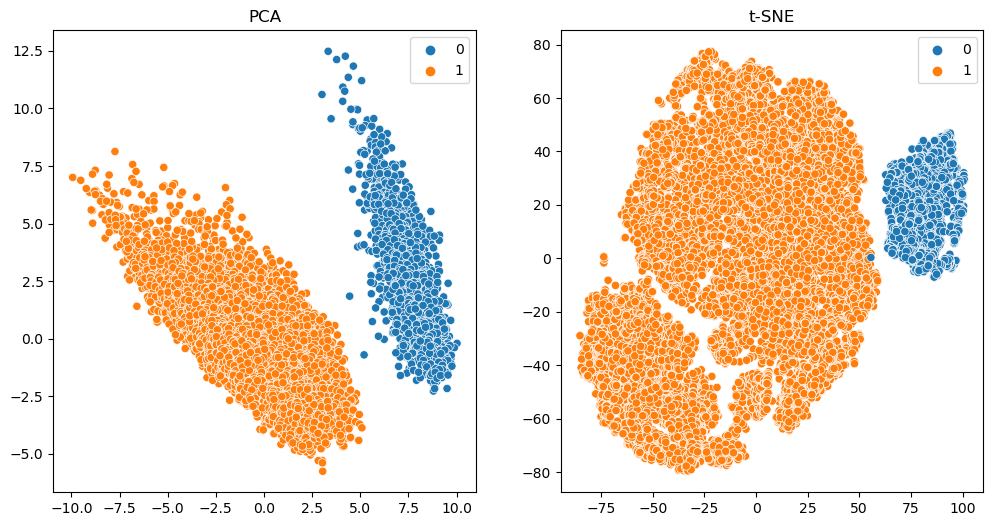

In [47]:
# Apply dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],hue=labels)
plt.title("PCA")

plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],hue=labels)
plt.title("t-SNE")

plt.show()

## Two other models

In [50]:
from sklearn.cluster import MeanShift

# Instantiate Mean Shift with a bandwidth value
bandwidth = 2.0
mean_shift = MeanShift(bandwidth=bandwidth)
labels = mean_shift.fit_predict(scaled_data)

# Get cluster labels and cluster centers
# cluster_labels = mean_shift.labels_
# cluster_centers = mean_shift.cluster_centers_

# print("Cluster Labels:", cluster_labels)
# print("Cluster Centers:", cluster_centers)

In [51]:
labels

array([ 2921,  1679,  6738, ..., 13272,   363, 13273])

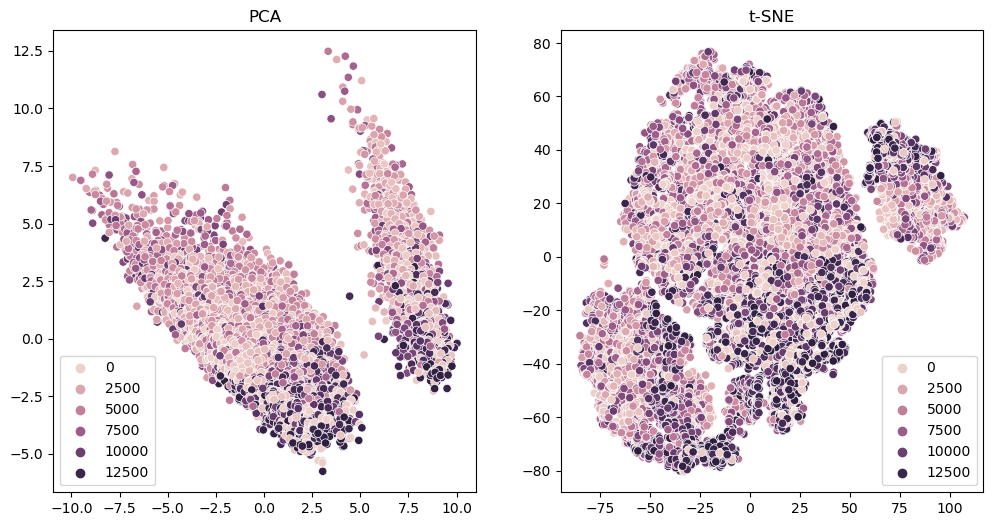

In [52]:
# Apply dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],hue=labels)
plt.title("PCA")

plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],hue=labels)
plt.title("t-SNE")

plt.show()

In [54]:
from sklearn.cluster import Birch
# Instantiate BIRCH with desired parameters
birch = Birch(threshold=0.5, n_clusters=3)  # You can adjust threshold and number of clusters
birch.fit(scaled_data)

# Get cluster labels
cluster_labels = birch.labels_

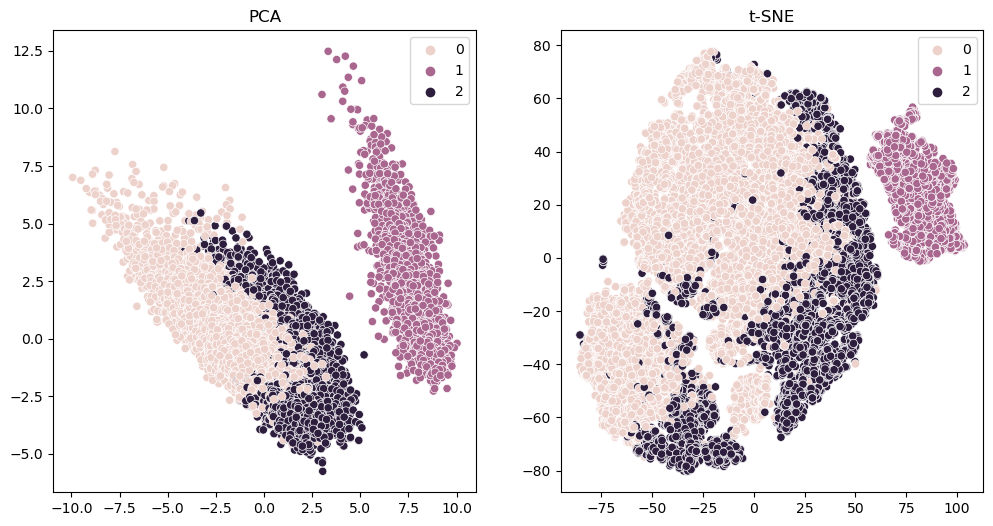

In [55]:
# Apply dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],hue=cluster_labels)
plt.title("PCA")

plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],hue=cluster_labels)
plt.title("t-SNE")

plt.show()

In [56]:
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
affinity_propagation.fit(scaled_data)

# Get cluster labels
cluster_labels = affinity_propagation.labels_

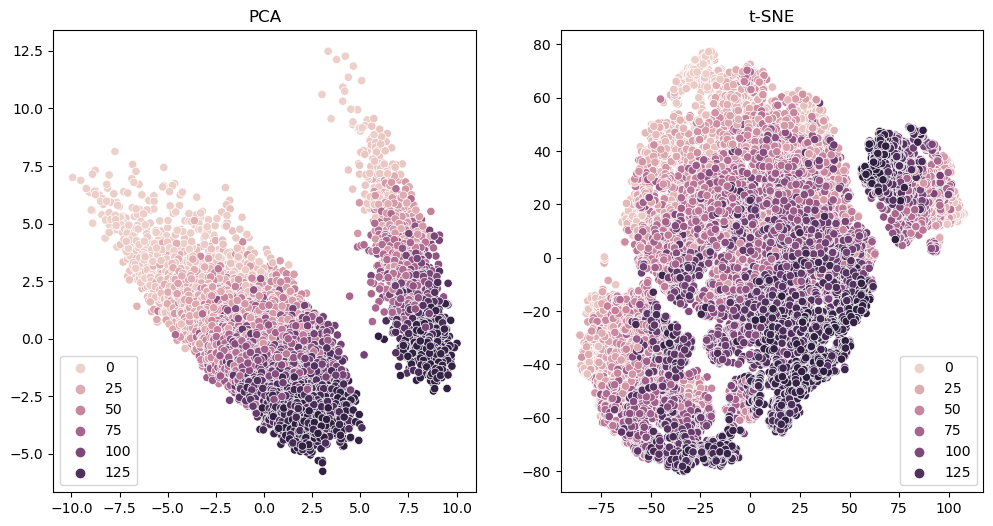

In [57]:
# Apply dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca_result = pca.fit_transform(scaled_data)
tsne_result = tsne.fit_transform(scaled_data)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],hue=cluster_labels)
plt.title("PCA")

plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],hue=cluster_labels)
plt.title("t-SNE")

plt.show()